<a href="https://colab.research.google.com/github/krsnvijay/Character-Generation/blob/master/Character_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive

mount_folder = '/content/gdrive'
drive.mount(mount_folder)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import os

app_folder = mount_folder + '/My Drive/'
os.chdir(app_folder)

In [0]:
!rm -rf stylegan/
!git clone https://github.com/NVlabs/stylegan.git

Cloning into 'stylegan'...
remote: Enumerating objects: 77, done.
remote: Total 77 (delta 0), reused 0 (delta 0), pack-reused 77
Unpacking objects: 100% (77/77), done.


In [0]:
!python stylegan/pretrained_example.py
!python stylegan/generate_figures.py
!ls results

Instructions for updating:
Colocations handled automatically by placer.

Gs                              Params    OutputShape          WeightShape     
---                             ---       ---                  ---             
latents_in                      -         (?, 512)             -               
labels_in                       -         (?, 0)               -               
lod                             -         ()                   -               
dlatent_avg                     -         (512,)               -               
G_mapping/latents_in            -         (?, 512)             -               
G_mapping/labels_in             -         (?, 0)               -               
G_mapping/PixelNorm             -         (?, 512)             -               
G_mapping/Dense0                262656    (?, 512)             (512, 512)      
G_mapping/Dense1                262656    (?, 512)             (512, 512)      
G_mapping/Dense2                262656    (?, 5

In [0]:
!pip install -q lucid>=0.2.3
!wget "https://github.com/krsnvijay/Character-Generation/raw/master/character.zip" && \
 unzip -qo character.zip && \
 ls -al character

--2019-04-09 04:24:41--  https://github.com/krsnvijay/Character-Generation/raw/master/character.zip
Resolving github.com (github.com)... 140.82.118.4, 140.82.118.3
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/krsnvijay/Character-Generation/master/character.zip [following]
--2019-04-09 04:24:42--  https://raw.githubusercontent.com/krsnvijay/Character-Generation/master/character.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6931093 (6.6M) [application/zip]
Saving to: ‘character.zip.3’

character.zip.3     100%[===================>]   6.61M  43.7MB/s    in 0.2s    

2019-04-09 04:24:42 (43.7 MB/s) - ‘character.zip.3’ saved [6931093/6931093]

t

In [0]:
import os
import io
import sys
from string import Template

import numpy as np
import PIL.Image
import matplotlib.pylab as pl

from IPython.display import clear_output, display, Image, HTML

from lucid.misc.gl.glcontext import create_opengl_context
import OpenGL.GL as gl

from lucid.misc.gl import meshutil
from lucid.misc.gl import glrenderer
import lucid.misc.io.showing as show
from lucid.misc.io import load
from lucid.misc.tfutil import create_session

from lucid.modelzoo import vision_models
from lucid.optvis import objectives
from lucid.optvis import param
from lucid.optvis import render as lucid_render
from lucid.optvis.param.spatial import sample_bilinear


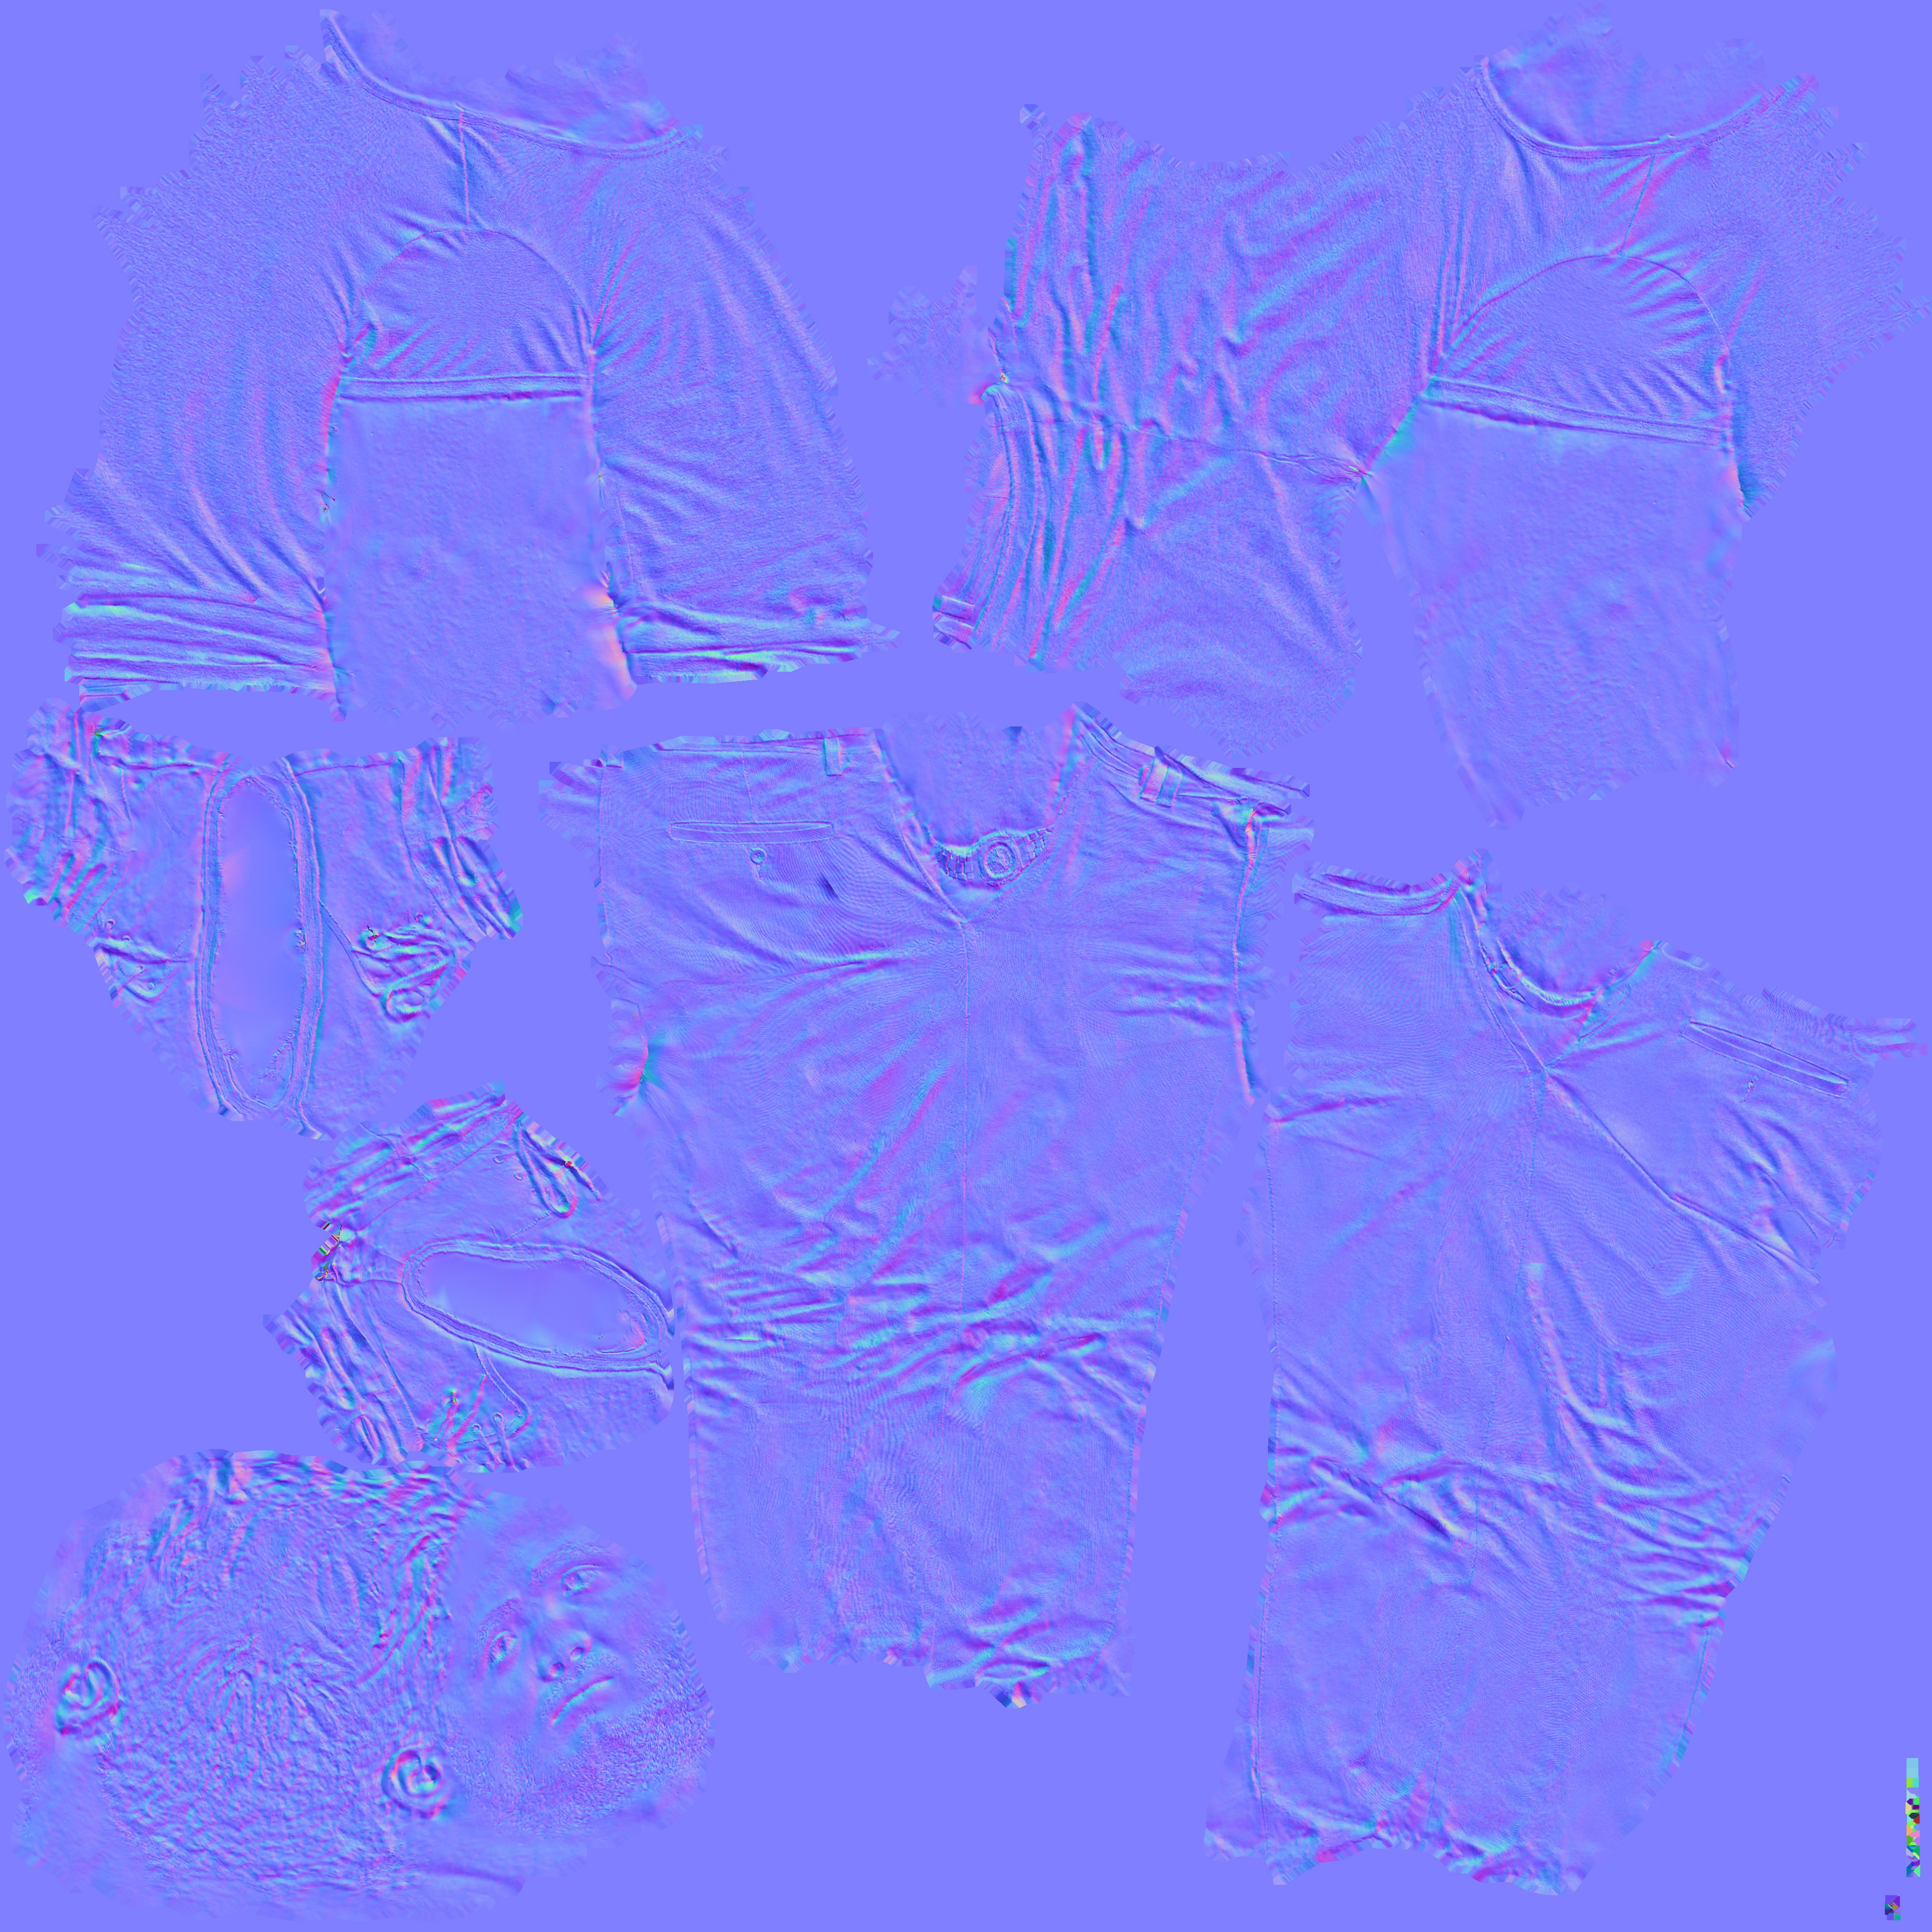

In [0]:
mesh = meshutil.load_obj(app_folder+'character/7.obj')
mesh = meshutil.normalize_mesh(mesh)
original_texture = load(app_folder+'character/2.jpg')
show.textured_mesh(mesh, original_texture)